In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL3NoZXJlbGxlL2VkYS1xdWFydG8='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/sherelle/anaconda3/lib/python3.11/importlib/_bootstrap.py": 1688566325.099929, "/Users/sherelle/anaconda3/lib/python3.11/importlib/_bootstrap_external.py": 1688566325.10184, "/Users/sherelle/anaconda3/lib/python3.11/zipimport.py": 1688566324.311398, "/Users/sherelle/anaconda3/lib/python3.11/codecs.py": 1688566324.057849, "/Users/sherelle/anaconda3/lib/python3.11/encodings/aliases.py": 1688566324.631356, "/Users/sherelle/anaconda3/lib/python3.11/encodings/__init__.py": 1688566324.629237, "/Users/sherelle/anaconda3/lib/python3.11/encodings/utf_8.py": 1688566324.863683, "/Users/sherelle/anaconda3/lib/python3.11/abc.py": 1688566324.023816, "/Users/sherelle/anaconda3/lib/python3.11/io.py": 1688566324.1319, "/Users/sherelle/anaconda3/lib/python3.11/stat.py": 1688566324.245591, "/Users/sherelle/anaconda3/lib/python3.11/_collections_abc.py": 1688566323.999995, "/Users/sherelle/anaconda3/lib/python3.11/genericpath.py": 1688566324.103327, "/Users/sherelle/anaconda3/lib/python3.11/posixp

In [2]:
import pandas as pd
import wbgapi as wb

In [3]:
indicators = {
    'gdp_per_capita': 'NY.GDP.PCAP.CD',
    'gdp_growth_rate': 'NY.GDP.MKTP.KD.ZG',
    'inflation_rate': 'FP.CPI.TOTL.ZG',
    'unemployment_rate': 'SL.UEM.TOTL.ZS',
    'total_population': 'SP.POP.TOTL',
    'life_expectancy': 'SP.DYN.LE00.IN',
    'adult_literacy_rate': 'SE.ADT.LITR.ZS',
    'income_inequality': 'SI.POV.GINI',
    'health_expenditure_gdp_share': 'SH.XPD.CHEX.GD.ZS',
    'measles_immunisation_rate': 'SH.IMM.MEAS',
    'education_expenditure_gdp_share': 'SE.XPD.TOTL.GD.ZS',
    'primary_school_enrolment_rate': 'SE.PRM.ENRR',
    'exports_gdp_share': 'NE.EXP.GNFS.ZS'
}

# Get the list of country codes for the "World" region
country_codes = wb.region.members('WLD')

# Download data for countries only in 2022
df = wb.data.DataFrame(indicators.values(), economy=country_codes, time=2022, skipBlanks=True, labels=True).reset_index()

# Delete the 'economy' column
df = df.drop(columns=['economy'], errors='ignore')

# Create a reversed dictionary mapping indicator codes to names
# Rename the columns and convert all names to lowercase
df.rename(columns=lambda x: {v: k for k, v in indicators.items()}.get(x, x).lower(), inplace=True)

# Sort 'country' in ascending order
df = df.sort_values('country', ascending=True)

# Reset the index after sorting
df = df.reset_index(drop=True)

# Display the number of rows and columns
print(df.shape)

# Display the first few rows of the data
print(df.head(3))

# Save the data to a CSV file
df.to_csv('wdi.csv', index=False)

(217, 14)
       country  inflation_rate  exports_gdp_share  gdp_growth_rate  \
0  Afghanistan       13.712102          18.380042        -6.240172   
1      Albania        6.725203          37.197082         4.826696   
2      Algeria        9.265516          30.808979         3.600000   

   gdp_per_capita  adult_literacy_rate  primary_school_enrolment_rate  \
0      357.261153                  NaN                            NaN   
1     6846.426694                  NaN                      96.371230   
2     4961.552577                  NaN                     105.747154   

   education_expenditure_gdp_share  measles_immunisation_rate  \
0                              NaN                       56.0   
1                         2.729770                       86.0   
2                         4.749247                       79.0   

   health_expenditure_gdp_share  income_inequality  unemployment_rate  \
0                     23.088169                NaN             14.100   
1        

In [4]:
import pandas as pd

df = pd.read_csv("wdi.csv")
df = df[["country", "gdp_per_capita", "life_expectancy", "inflation_rate"]].dropna()
df.head(3)

,country,gdp_per_capita,life_expectancy,inflation_rate
0,Afghanistan,357.261153,65.617,13.712102
1,Albania,6846.426694,78.769,6.725203
2,Algeria,4961.552577,76.129,9.265516


In [5]:
desc = df[["gdp_per_capita", "life_expectancy", "inflation_rate"]].describe().T.reset_index()
desc.rename(columns={"index": "indicator"}, inplace=True)
desc

,indicator,count,mean,std,min,25%,50%,75%,max
0,gdp_per_capita,174.0,17468.036627,23616.374008,250.634225,2589.209681,6788.136647,20981.717143,123719.658916
1,life_expectancy,174.0,72.919539,7.956882,18.818000,67.731750,74.133000,77.894226,85.708000
2,inflation_rate,174.0,12.742605,19.923911,-1.610680,5.361652,7.949251,11.840016,171.205491


In [6]:
n_countries = df["country"].nunique()
n_countries

174

In [7]:
corr = df[["gdp_per_capita", "life_expectancy", "inflation_rate"]].corr()
corr

,gdp_per_capita,life_expectancy,inflation_rate
gdp_per_capita,1.000000,0.601626,-0.164250
life_expectancy,0.601626,1.000000,-0.068469
inflation_rate,-0.164250,-0.068469,1.000000


Text(0, 0.5, 'Life expectancy (years)')

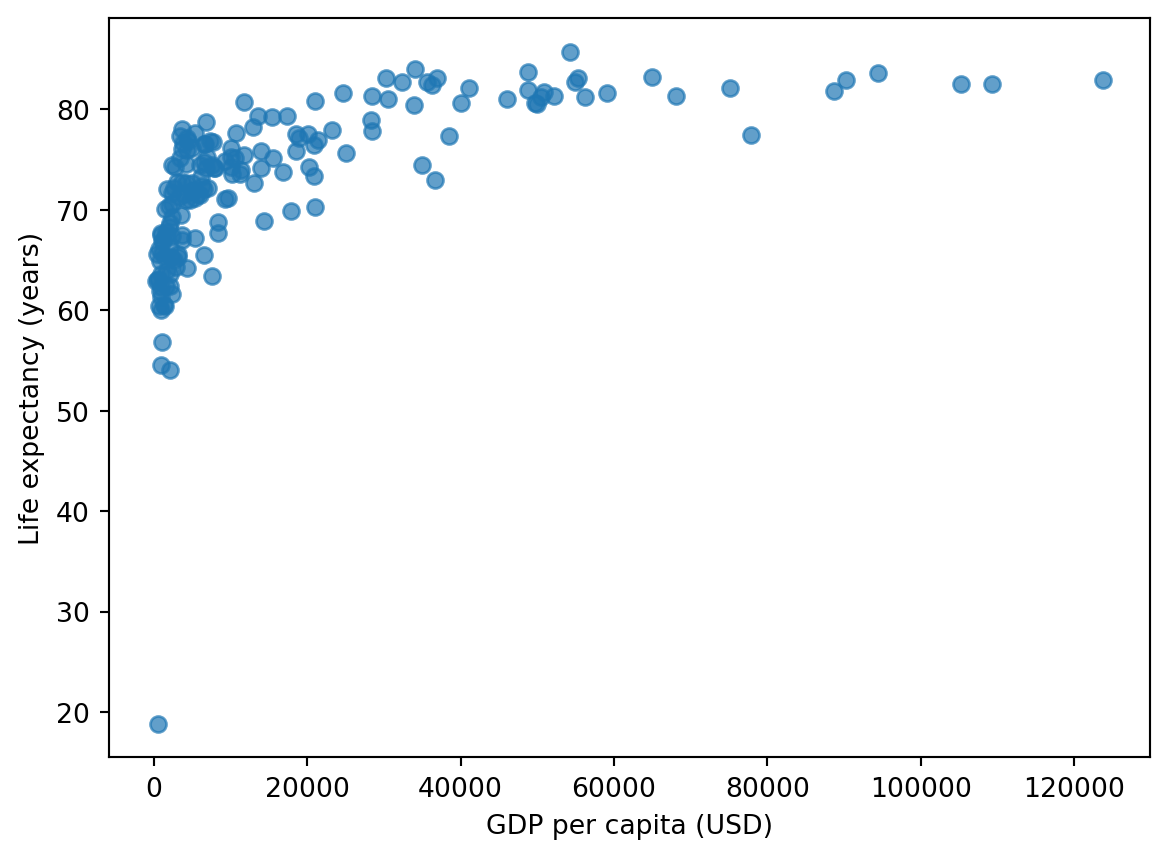

In [8]:
import matplotlib.pyplot as plt

#| label: fig-scatter
#| fig-cap: "Life expectancy vs GDP per capita (2022) [@worldbankWDI]."
#| echo: false
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df["gdp_per_capita"], df["life_expectancy"], alpha=0.7)
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life expectancy (years)")

Text(0, 0.5, 'Number of countries')

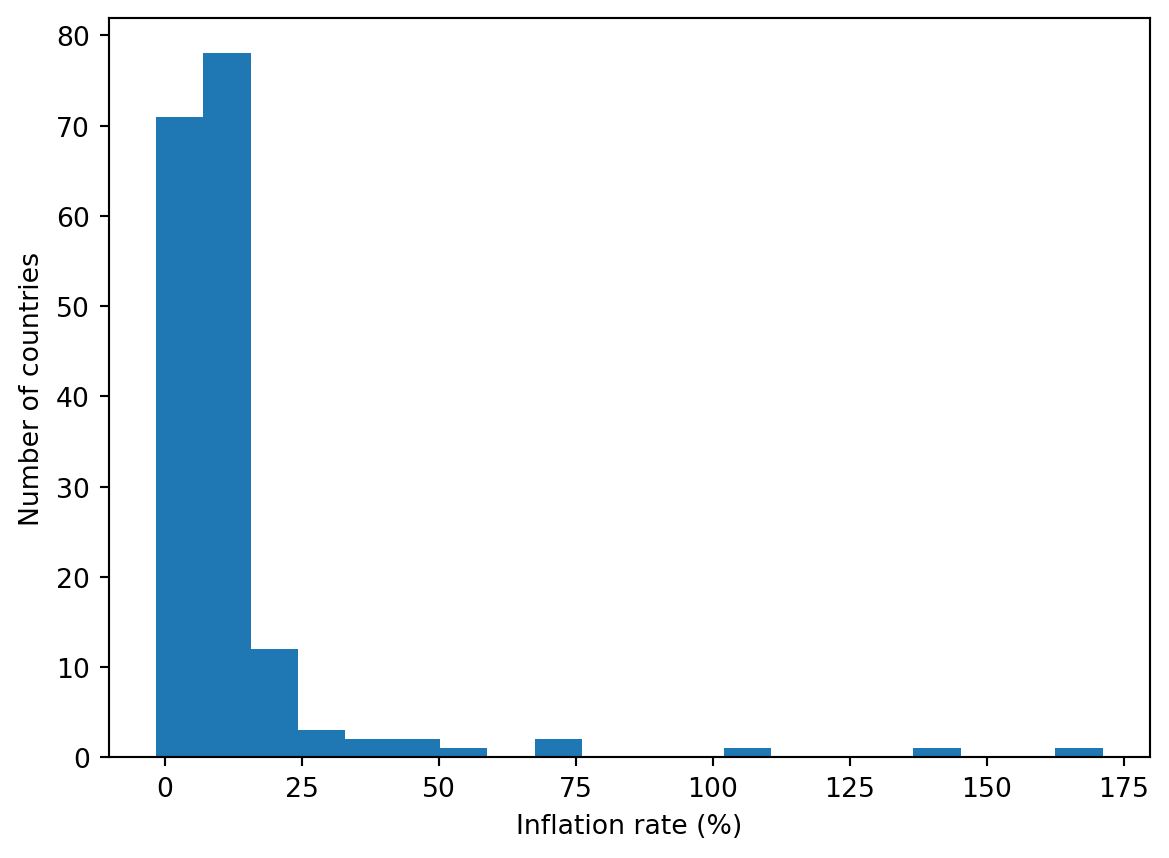

In [9]:
#| label: fig-hist
#| fig-cap: Distribution of inflation rates (2022) [@worldbankWDI].
#| echo: false
plt.figure()
plt.hist(df["inflation_rate"].dropna(), bins=20)
plt.xlabel("Inflation rate (%)")
plt.ylabel("Number of countries")

Text(0.5, 0, 'GDP per capita (USD)')

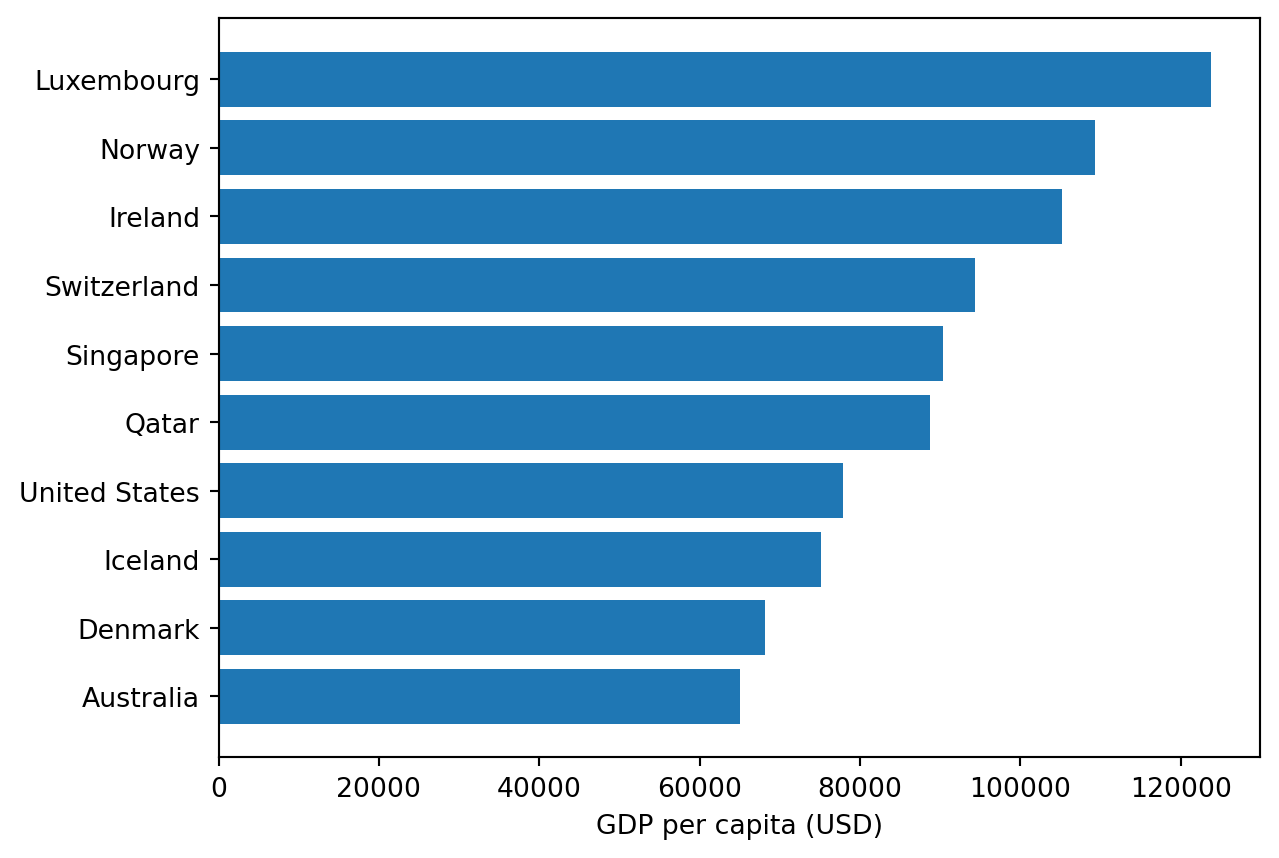

In [10]:
#| label: fig-bar
#| fig-cap: Top 10 countries by GDP per capita (2022)[@worldbankWDI].
#| echo: false
top10 = df.sort_values("gdp_per_capita", ascending=False).head(10).iloc[::-1]
plt.figure()
plt.barh(top10["country"], top10["gdp_per_capita"])
plt.xlabel("GDP per capita (USD)")

In [11]:
# Export dataset for slides to reuse
df.to_csv("world_indicators_2022.csv", index=False)